In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


Saving API_19_DS2_en_csv_v2_5361599.csv to API_19_DS2_en_csv_v2_5361599.csv


In [ ]:
dataset = pd.read_csv('API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)




Checking for duplicates...
Duplicates found. Aggregating by taking the mean of duplicate entries.
Descriptive Statistics:
                1990          1995          2000          2005          2010  \
count  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   
mean   3.737817e+08  3.538973e+08  3.288758e+08  4.980422e+08  1.177752e+09   
std    6.945085e+08  5.561539e+08  4.887077e+08  6.516323e+08  1.187653e+09   
min    1.982921e+07  3.314806e+07  6.755622e+07  1.180198e+08  1.694191e+08   
25%    2.276229e+07  4.693439e+07  7.669911e+07  1.634907e+08  6.154888e+08   
50%    2.489781e+07  8.669003e+07  7.972602e+07  2.197300e+08  6.685142e+08   
75%    1.922448e+08  2.683078e+08  2.251372e+08  3.342625e+08  1.246321e+09   
max    1.609175e+09  1.334406e+09  1.195260e+09  1.654708e+09  3.189015e+09   

               2015          2020  
count  5.000000e+00  5.000000e+00  
mean   2.846826e+09  5.240093e+07  
std    2.550924e+09  4.493705e+07  
min    2.144826e+08  

<Figure size 1000x600 with 0 Axes>

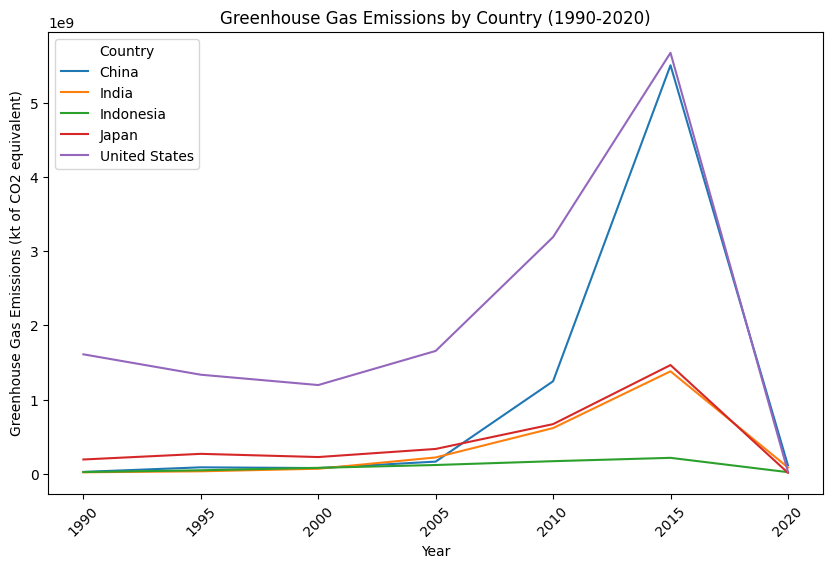

<ipython-input-5-a5a9a36f202d>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette="viridis")


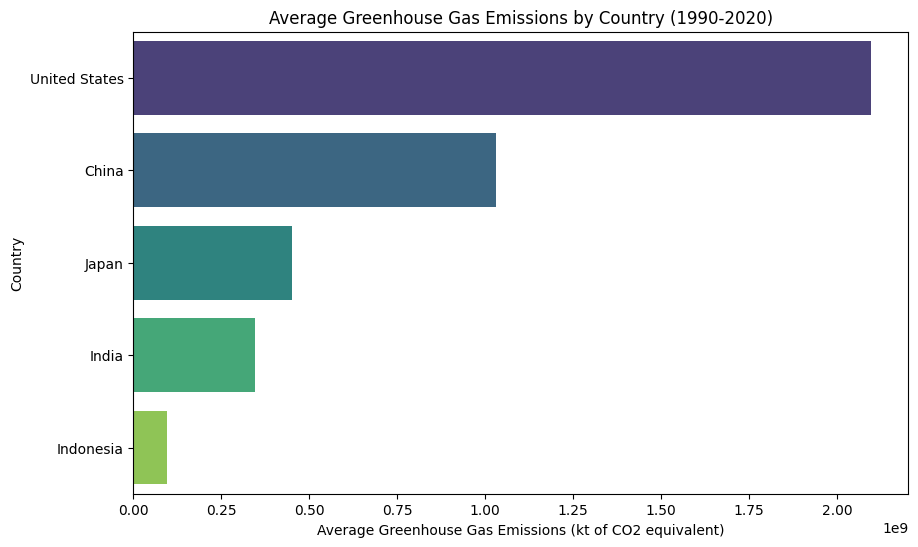

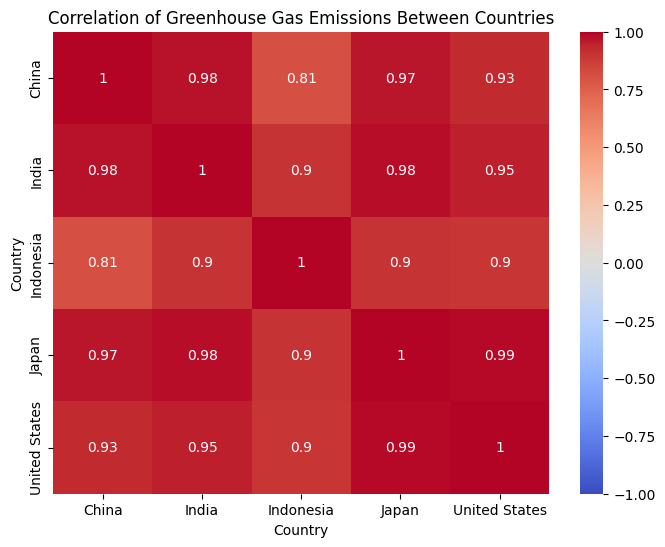


Statistical Analysis of Emissions (1990-2020):

Country: United States
  Mean: 2097424136.13
  Median: 1609174502.78
  Std Dev: 1829371596.14
  Skewness: 1.08
  Kurtosis: 0.20

Country: China
  Mean: 1030846943.65
  Median: 114270101.18
  Std Dev: 2018983924.26
  Skewness: 1.87
  Kurtosis: 1.73

Country: India
  Mean: 345955707.84
  Median: 85754783.66
  Std Dev: 501269186.33
  Skewness: 1.46
  Kurtosis: 0.64

Country: Japan
  Mean: 452225257.14
  Median: 268307834.69
  Std Dev: 488399829.93
  Skewness: 1.43
  Kurtosis: 0.75

Country: Indonesia
  Mean: 96101964.98
  Median: 79726019.24
  Std Dev: 74742924.98
  Skewness: 0.49
  Kurtosis: -1.18


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis



# Select relevant countries
countries = ['United States', 'China', 'India', 'Japan', 'Indonesia']
dataset = dataset[dataset['Country Name'].isin(countries)]

# Select years 1990-2020 in five-year increments
years = [str(year) for year in range(1990, 2021, 5)]
dataset = dataset.loc[:, ['Country Name'] + years]

# Check for duplicates
print("Checking for duplicates...")
duplicates = dataset.duplicated(subset=['Country Name'] + years, keep=False)
if duplicates.any():
    print("Duplicates found. Aggregating by taking the mean of duplicate entries.")
    # Aggregate duplicates by taking the mean
    dataset = dataset.groupby('Country Name').mean().reset_index()
else:
    print("No duplicates found.")

# Reshape data to a long format for easier plotting
df = dataset.set_index('Country Name').stack().reset_index()
df.columns = ['Country', 'Year', 'Emissions']
df = df.pivot(index='Year', columns='Country', values='Emissions')

# Descriptive statistics
desc_stats = dataset[years].describe()
print("Descriptive Statistics:\n", desc_stats)

# Function to create a line plot of greenhouse gas emissions by country
def plot_line_emissions():
    """
    Function to create and display a line graph of greenhouse gas emissions by country.
    Shows trends in greenhouse gas emissions from 1990 to 2020.
    """
    plt.figure(figsize=(10, 6))
    ax = df.plot(kind='line', figsize=(10, 6))
    ax.set_xlabel('Year')
    ax.set_ylabel('Greenhouse Gas Emissions (kt of CO2 equivalent)')
    ax.set_title('Greenhouse Gas Emissions by Country (1990-2020)')
    plt.xticks(rotation=45)
    plt.show()

# Function to create a bar plot showing average emissions per country
def plot_avg_emissions_bar():
    """
    Function to create and display a bar chart showing the average emissions per country.
    This highlights which countries have higher or lower emissions on average.
    """
    avg_emissions = df.mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette="viridis")
    plt.xlabel('Average Greenhouse Gas Emissions (kt of CO2 equivalent)')
    plt.ylabel('Country')
    plt.title('Average Greenhouse Gas Emissions by Country (1990-2020)')
    plt.show()

# Function to create a heatmap of correlations between emissions of different countries
def plot_emissions_correlation():
    """
    Function to create and display a heatmap of correlations between emissions of different countries.
    Shows the strength of linear relationships in emission patterns.
    """
    correlation_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation of Greenhouse Gas Emissions Between Countries')
    plt.show()

# Display plots
plot_line_emissions()
plot_avg_emissions_bar()
plot_emissions_correlation()

# Additional statistical analysis: skewness, kurtosis, and standard deviation for emissions by country
print("\nStatistical Analysis of Emissions (1990-2020):")
for country in countries:
    emissions = df[country].dropna()
    print(f"\nCountry: {country}")
    print(f"  Mean: {emissions.mean():.2f}")
    print(f"  Median: {emissions.median():.2f}")
    print(f"  Std Dev: {emissions.std():.2f}")
    print(f"  Skewness: {skew(emissions):.2f}")
    print(f"  Kurtosis: {kurtosis(emissions):.2f}")

